### Exploratory Data Analysis (EDA)
La siguiente sección tiene el objetivo de utilizar técnicas estadísticas y de visualización para responder las **preguntas** que nuestro cliente ha realizado respecto al problema comercial planteado y también dar una visibilidad inicial sobre cuales variables podemos utilizar para nuestro modelo y que contribuyen a explicar el comportamiento del **"Churn"**.

**Pregunta 1**: Cómo ha sido nuestro performance ventas, órdenes, ticket promedio y cliente mensuales a partir del 2019? ¿Hemos tenido crecimeinto de clientes, venta y órdenes?

In [1]:
#Configuración y lectura de datos
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.style.use("bmh")
warnings.filterwarnings("ignore")


route = "C:/Users/abrah/Documents/"

df = pd.read_csv(route + "Ecommerce_Transactions.csv", sep = '|', encoding = 'UTF8') #Leemos nuestros datos através de un archivo CSV e imprimios las columnas contenidas así como su data type que manejan por default.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26752469 entries, 0 to 26752468
Data columns (total 97 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Almacen de Origen                     object 
 1   Almacen detalle                       object 
 2   banco                                 object 
 3   Bandera bundle final                  object 
 4   Bandera CBT                           object 
 5   Bandera pagos                         object 
 6   canal                                 object 
 7   Canal_formato_SO                      object 
 8   cantidad                              int64  
 9   Carrier                               object 
 10  CATEGORIA                             object 
 11  Categoria ecomm                       object 
 12  CLICK AND COLLECT                     object 
 13  codigo postal                         float64
 14  Comision MKP sin IVA                  float64
 15  Comision MSI 

In [2]:

## Transforma los tipos de datos oríginales de las distintas variables a los tipos que necesitamos para manipular la información. 
df["FECHA DE CREACION"] = pd.to_datetime(df["FECHA DE CREACION"], format  = "%Y-%m-%d")
df["Fecha de confirmacion"] = pd.to_datetime(df["Fecha de confirmacion"], format  = "%Y-%m-%d")
df["Fecha de cancelacion"] = pd.to_datetime(df["Fecha de cancelacion"], format  = "%Y-%m-%d")
#df["fecha de embarque"] = pd.to_datetime(df["fecha de embarque"], format  = "%Y-%m-%d")
#df["Fecha de entrega"] = pd.to_datetime(df["Fecha de entrega"], format  = "%Y-%m-%d")
#df["Fecha maxima de entrega"] = pd.to_datetime(df["Fecha maxima de entrega"], format  = "%Y-%m-%d")
#df["Fecha minima de entrega"] = pd.to_datetime(df["Fecha minima de entrega"], format  = "%Y-%m-%d")

df["Año"] = df["FECHA DE CREACION"].dt.year
df["Mes"] = df["FECHA DE CREACION"].dt.month
df["Dia"] = df["FECHA DE CREACION"].dt.day

df["Venta bruta sin descuentos con flete"] = df["Venta bruta sin descuentos con flete"].fillna(0)
df["cantidad"] = df["cantidad"].fillna(0)
df["Piezas canceladas"] = df["Piezas canceladas"].fillna(0)
df["Venta cancelada"] = df["Venta cancelada"].fillna(0)
df["Total_venta"] = df["Venta bruta sin descuentos con flete"] + df["Venta cancelada"]
df["Total_piezas"] = df["Piezas canceladas"] + df["cantidad"]

df["Año"] = df["Año"].astype("O")
df["Mes"] = df["Mes"].astype("O")
df["Dia"] = df["Dia"].astype("O")

#Consider only payments made over our customers
df = df[(df["Fecha de confirmacion"].notna()) & (df.loc[:,"Bandera bundle final"] == "No") & (df.loc[:,"es ron"] == "No")]

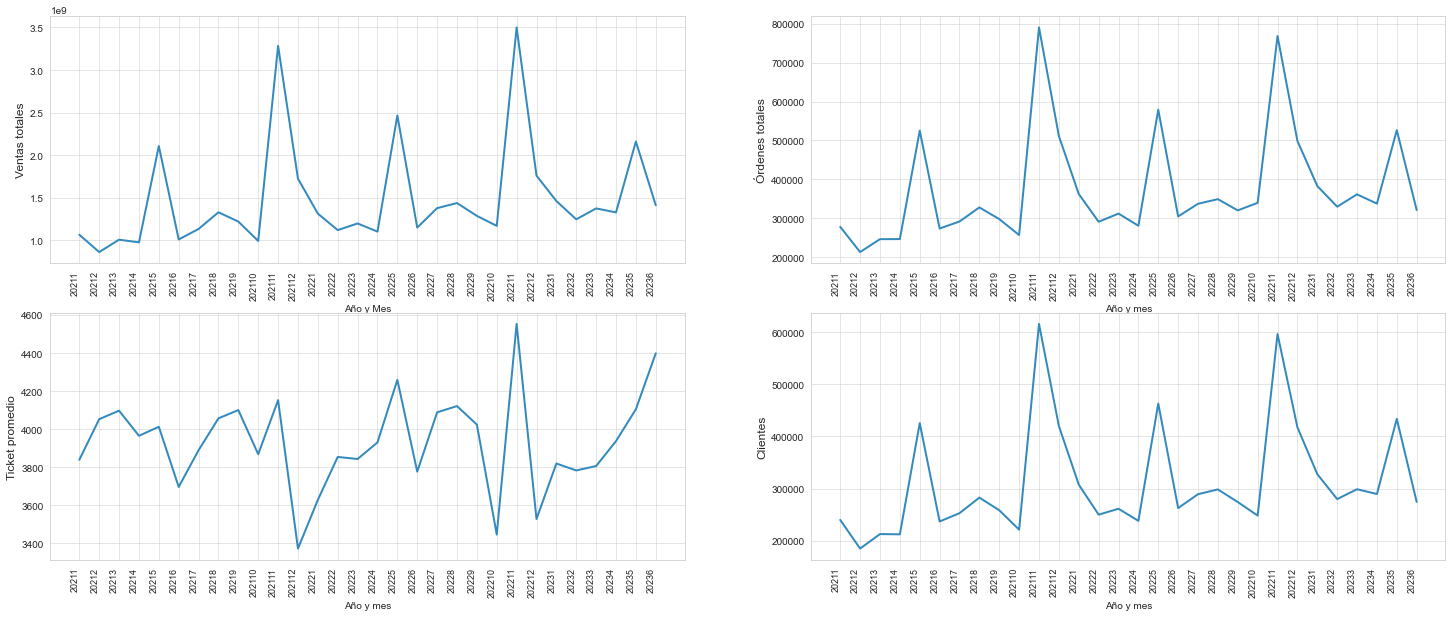

In [23]:

df_total_sales = df.groupby(["Año","Mes"]).agg({'Total_venta': np.sum,'Customer_ID': lambda x: x.nunique(dropna = False), 'Order_ID': lambda x: x.nunique(dropna = False)}).reset_index()
df_total_sales["Añomes"] = df_total_sales["Año"].map(str) + df_total_sales["Mes"].map(str) 
df_total_sales["Ticket promedio"] = df_total_sales["Total_venta"] / df_total_sales["Order_ID"] 

fig, ax_ = plt.subplots(2,2,figsize = (25,10))

k1 = sns.lineplot(data = df_total_sales, x ="Añomes", y = "Total_venta", ax = ax_[0][0])
k1.set_xlabel('Año y Mes', fontsize = 10)
k1.set_ylabel('Ventas totales')
#k1.set_title("Ventas históricas de negocio", fontsize = 15, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 9)


k2 = sns.lineplot(data = df_total_sales, x ="Añomes", y = "Order_ID" ,ax = ax_[0][1])
k2.set_xlabel("Año y mes", fontsize = 10)
k2.set_ylabel('Órdenes totales')
#k2.set_title("Órdenes totales de negocio por cliente", fontsize = 15, horizontalalignment = "center")

xtick_loc = k2.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k2.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 9)


k3 = sns.lineplot(data = df_total_sales, x ="Añomes", y = "Ticket promedio" ,ax = ax_[1][0])
k3.set_xlabel('Año y mes', fontsize = 10)
k3.set_ylabel('Ticket promedio')
#k3.set_title("Ticket promedio histórico", fontsize = 15, horizontalalignment = "center")

xtick_loc = k3.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k3.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 9)



k4 = sns.lineplot(data = df_total_sales, x ="Añomes", y = "Customer_ID" ,ax = ax_[1][1])
k4.set_xlabel('Año y mes', fontsize = 10)
k4.set_ylabel('Clientes')
#k4.set_title("Clientes histórico", fontsize = 15, horizontalalignment = "center")

xtick_loc = k4.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k4.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 9)



**Respuesta**:
Se observa que en general, nuestras ventas , órdenes y clientes han crecido a alo largo del mes.

Respecto al ticket promedio, de observa un crecimeinto de este a partir del 2020 Marzo, donde en México se empieza a desarrollar la pandemia por **COVID 19**, así, vemos que de aquí se mantiene estable con ciertos picos particulares durante los meses de Mayo y Novimebre de cada año que es cuando se celebran lo eventos comerciales "Hot Sale / Hot days" y el "Buen Fin". 

Con respecto a las ventas, como se comentó, tenemos un crecimeinto sostenibe durante 2019,2020 y 2021, esto, debido a una migración de venta de las tiendas físicas al ecosistema Online.  A partir del 2022 se empieza a normalizar el crecimimiento ya que las actividades cotidianas se empezaron a normalizar y los clientes tiene más opciones físicias para realizar sus compras.

***Sugerencia:*** Dado que los años 2020 y 2021 son años de pandemia principalmente, nuestra estrategia en el 2023 deberá ser enfocada en retener nuestros clientes. La apertura de actividades, tiendas físicas yh la inclusión de nuevos ecommerce parecen desacelerar nuestro crecimiento. 


**Pregunta 2** : ¿Cómo es el performance en términos de categorías, tipos de pago y cuanto descuentos están utilizando nuestros cliente? ¿Existe un incentivo que los haga comprar en nuestro negocio?

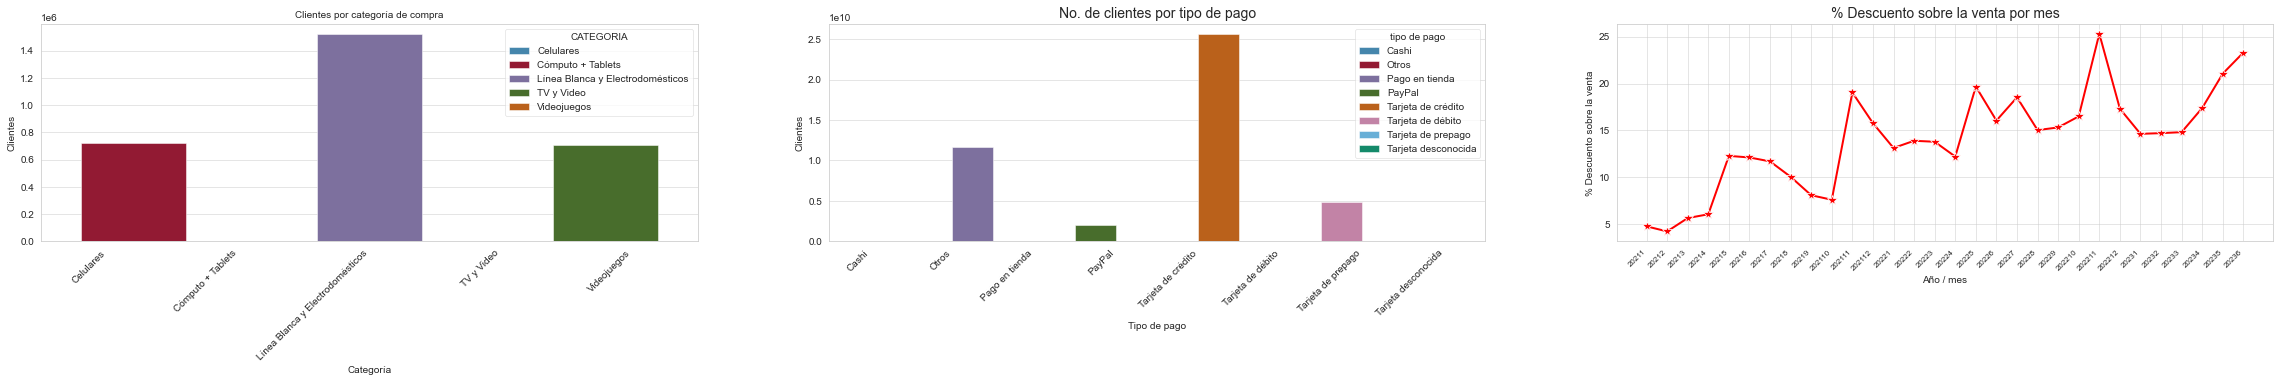

In [24]:
df_categories = df.groupby(["CATEGORIA"]).agg({'Order_ID': lambda x: x.nunique(dropna = False), 'Customer_ID': lambda x: x.nunique(dropna = False),  "Total_venta": np.sum,"Total_piezas":np.sum}).reset_index()
top_categorias = df_categories.groupby(["CATEGORIA"])["Total_venta"].sum().reset_index().sort_values(by = 'Total_venta', ascending = False)["CATEGORIA"].values[0:5]
df_categories = df_categories[df_categories.loc[:,"CATEGORIA"].isin(top_categorias)]

fig, a = plt.subplots(1,3, figsize = (40,4))

k1 = sns.barplot(data = df_categories, x = "CATEGORIA", y = "Customer_ID",hue = "CATEGORIA", ax = a[0],  width = 4.0)
k1.set_xlabel('Categoría', fontsize = 10)
k1.set_ylabel('Clientes', fontsize=10)
k1.set_title("Clientes por categoría de compra", fontsize = 10, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_categories["CATEGORIA"].drop_duplicates()
# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 10)

###################

df_pt_customers = df.groupby(["tipo de pago"]).agg({'Total_venta': np.sum,'Order_ID': lambda x: x.nunique(dropna=False), 'Customer_ID': lambda x: x.nunique(dropna=False)}).reset_index()

k2 = sns.barplot(data = df_pt_customers, x = "tipo de pago", y = "Total_venta",hue = "tipo de pago", ax = a[1], width = 4.0)
k2.set_xlabel('Tipo de pago', fontsize = 10)
k2.set_ylabel('Clientes', fontsize=10)
k2.set_title("No. de clientes por tipo de pago", fontsize = 14, horizontalalignment = "center")

xtick_loc = k2.get_xticks()
xtick_labels = df_pt_customers["tipo de pago"].drop_duplicates().values
# Set the x-axis ticks
k2.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 10)

###################

df_promotions = df.groupby(["Año","Mes"]).agg({'Total descuentos' : np.sum, 'Total_venta': np.sum}).reset_index()
df_promotions["Añomes"] = df_promotions["Año"].map(str) + df_promotions["Mes"].map(str) 
df_promotions["%Desc/venta"] = 100 * (df_promotions["Total descuentos"] / df_promotions["Total_venta"]) 

k3 = sns.lineplot(data = df_promotions, x = "Añomes", y = "%Desc/venta", ax = a[2], marker = '*', markersize = 10, c = 'red')
k3.set_xlabel('Año / mes', fontsize = 10)
k3.set_ylabel('% Descuento sobre la venta', fontsize=10)
k3.set_title("% Descuento sobre la venta por mes", fontsize = 14, horizontalalignment = "center")

xtick_loc = k3.get_xticks()
xtick_labels = df_promotions["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k3.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 8)


**Respuesta**:
Se observa que términos de categorías, las que más adquieren cliente o donde más compran  son en las categorías de
1. TV y Video
2. Blancos, colchones y baño
3. Cómputo + Tablets
4. Videojuegos
5. Deportes
6. Autos y Llantas

Como observación, debemos mantener un buen catálogo y buena relación de precios sobre las principales tres categorías, ya que esto nos permitirá mantenernos competitivos y poder mantener la recomendación de nuestros clientes como el mejor lugar para comprar dichos productos. 

Dentro de la parte de pagos, nuestros clientes compran más a través de **tarjeta de crédito** , esto, por que el negocio brinda la posibilidad de capitalizar más venntas. También vemos que pago en tienda ofrece la posibilidad de capitalizar clientes que no tienen la posibilidad o no confían del pago en línea pero que al final pueden realizar su compra a través de la tienda. 

En relación al descuento sobre la venta,  vemos que apartir del 2020 vemos que el factor de descuento sobre la venta alcanza entre los 12% yu 15%, donde este se detona en los eventos del Hot Sale y Buen Fin (Mayo y Noviembre), a patir de aquí, en 2021 vemos otro incremento en la promocionalidad de la venta. Así, vemos que nuestros clientes cada vez más hacen **uso de descuentos como Cupones o descuento en precio de productos para incentivar la venta**. 


**Pregunta 3:** ¿Cómo se ve la distribución mensual de la venta y clientes entre nuevos y no nuevos?

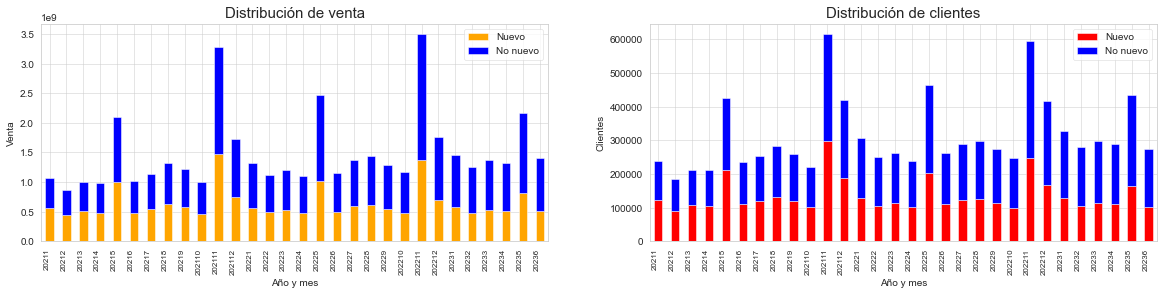

In [25]:
#Con esto idealmente podríamos comprobar si realmente debemos tener ya más interacción de clientes nueovs y no nuevos

df_total_canales = df.groupby(["FECHA DE CREACION","Canal_grouped"]).agg({'Total_venta': np.sum, 'Customer_ID': lambda x: x.nunique(dropna = False), 'Order_ID': lambda x: x.nunique(dropna = False)})

df_total_sales_customer = df.groupby(["Año","Mes","Tipo_cliente"]).agg({'Total_venta': np.sum, 'Customer_ID': lambda x: x.nunique(dropna = False), 'Order_ID': lambda x: x.nunique(dropna = False)}).reset_index()
df_total_sales_customer["Añomes"] = df_total_sales_customer["Año"].map(str) + df_total_sales_customer["Mes"].map(str) 
df_total_sales_customer["Ticket promedio"] = df_total_sales_customer["Total_venta"] / df_total_sales_customer["Order_ID"] 
df_total_sales_customer["Frecuencia_compra"] = df_total_sales_customer["Order_ID"] / df_total_sales_customer["Customer_ID"] 

###################################
df_grouped_sales = pd.DataFrame({'Añomes': df_total_sales_customer.loc[:,"Añomes"].drop_duplicates().drop_duplicates(), "Nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "Nuevo"].loc[:,"Total_venta"].values, "No nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "No nuevo"].loc[:,"Total_venta"].values})
df_grouped_customer = pd.DataFrame({'Añomes': df_total_sales_customer.loc[:,"Añomes"].drop_duplicates().drop_duplicates(), "Nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "Nuevo"].loc[:,"Customer_ID"].values, "No nuevo" : df_total_sales_customer[df_total_sales_customer["Tipo_cliente"] == "No nuevo"].loc[:,"Customer_ID"].values})

#df_grouped_sales

fig, ax_ = plt.subplots(1,2, figsize = (20,4))

k1 = df_grouped_sales.plot(kind = 'bar',x = "Añomes", stacked=True, color = ['orange','blue'], ax = ax_[0])
k1.set_xlabel('Año y mes', fontsize = 10)
k1.set_ylabel('Venta', fontsize=10)
k1.set_title("Distribución de venta", fontsize = 15, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 8)


k2 = df_grouped_customer.plot(kind = 'bar',x = "Añomes", stacked=True, color = ['red','blue'], ax = ax_[1])
k2.set_xlabel('Año y mes', fontsize = 10)
k2.set_ylabel('Clientes', fontsize=10)
k2.set_title("Distribución de clientes", fontsize = 15, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_total_sales["Añomes"].drop_duplicates().values
# Set the x-axis ticks
k2.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 8)



**Respuesta**:

Como se observa, en los años 2020 y 2021 nuestra proporición de clientes nuevos y no nuevos (también venta) se ve ligeramente inclinado hacia clientes nuevos. Principalmente por efectos de pandemia y **canibalización de clientes físicos al ecossitema ecommerce**.

Si observamos durante el 2023, y los últimos meses del 2022. vemos una relación de clientes nuevos vs no nuevos en un 40% - 60%, esto es, nuestra venta ya empieza componerse a través de clientes no nuevos, lo cual es un buen punto que hace pensar que nuestros clientes nos tienen en el top of mind como sitio preferido de compra. También, empezamos a ver fidelización de nuestros clientes. 

**Sugerencia:** Dado que nuestra venta empiez a a componerse más de clientes no nuevos, prestar atención en estrategias comerciales de retención es importante para evitar el Churn ppor arte de éstos. 

**Pregunta 4**:  ¿Cómo se observa nuestra frecuencia de compra de nuestros clientes en un periodo mensual y que otros insights podemos obtener?

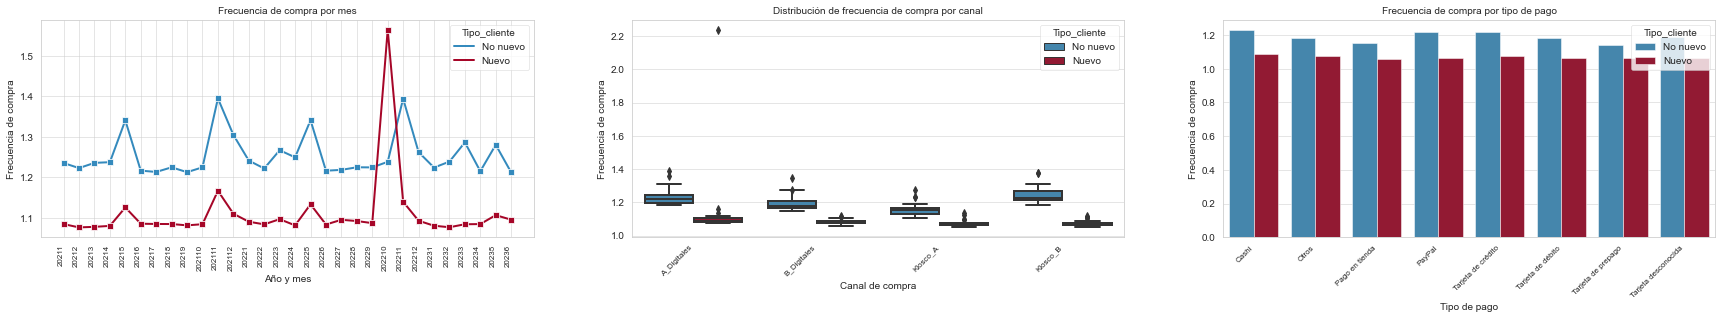

In [26]:

fig, a = plt.subplots(1,3, figsize = (30,4))

###################

k1 = sns.lineplot(data = df_total_sales_customer.loc[:,["Añomes","Tipo_cliente","Frecuencia_compra"]], x = "Añomes", y = "Frecuencia_compra",hue = "Tipo_cliente", ax = a[0], marker = 's', markersize = 6)
k1.set_xlabel('Año y mes', fontsize = 10)
k1.set_ylabel('Frecuencia de compra', fontsize=10)
k1.set_title("Frecuencia de compra por mes", fontsize = 10, horizontalalignment = "center")

xtick_loc = k1.get_xticks()
xtick_labels = df_total_sales_customer.loc[:,["Añomes","Tipo_cliente","Frecuencia_compra"]].loc[:,"Añomes"].drop_duplicates().values
# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 90, ha = 'right', fontsize = 8)

###################

df_channel_customers = df.groupby(["Año","Mes","Canal_grouped","Tipo_cliente"]).agg({'Total_venta': np.sum,'Order_ID': lambda x: x.nunique(dropna=False), 'Customer_ID': lambda x: x.nunique(dropna=False)}).reset_index()
df_channel_customers["Añomes"] = df_channel_customers["Año"].map(str) + df_channel_customers["Mes"].map(str)  
df_channel_customers["Frecuencia_compra"] = df_channel_customers["Order_ID"] / df_channel_customers["Customer_ID"]  

k2 = sns.boxplot(data = df_channel_customers, x = "Canal_grouped", y = "Frecuencia_compra",hue = "Tipo_cliente", ax = a[1])
k2.set_xlabel('Canal de compra', fontsize = 10)
k2.set_ylabel('Frecuencia de compra', fontsize=10)
k2.set_title("Distribución de frecuencia de compra por canal", fontsize = 10, horizontalalignment = "center")

xtick_loc = k2.get_xticks()
xtick_labels = df_channel_customers.loc[:,"Canal_grouped"].drop_duplicates().values
# Set the x-axis ticks
k2.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 8)


###################

df_pt_customers = df.groupby(["tipo de pago","Tipo_cliente"]).agg({'Total_venta': np.sum,'Order_ID': lambda x: x.nunique(dropna=False), 'Customer_ID': lambda x: x.nunique(dropna=False)}).reset_index()
#df_channel_customers["Añomes"] = df_channel_customers["Año"].map(str) + df_channel_customers["Mes"].map(str)  
df_pt_customers["Frecuencia_compra"] = df_channel_customers["Order_ID"] / df_channel_customers["Customer_ID"]  

k3 = sns.barplot(data = df_pt_customers, x = "tipo de pago", y = "Frecuencia_compra",hue = "Tipo_cliente", ax = a[2])
k3.set_xlabel('Tipo de pago', fontsize = 10)
k3.set_ylabel('Frecuencia de compra', fontsize=10)
k3.set_title("Frecuencia de compra por tipo de pago", fontsize = 10, horizontalalignment = "center")

xtick_loc = k3.get_xticks()
xtick_labels = df_pt_customers["tipo de pago"].drop_duplicates().values
# Set the x-axis ticks
k3.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 8)




**Respuesta**:
Decidimos graficar la frecuencia de compra de manera mensual entre cliente nuevo y no nuevo, observamos que la frecunecia de compra de clientes nuevos o no nuevos no ha venido incrementando, es decir, las compras promedio por clientes se han mantenido estables a lo largo del tiempo, donde vemos que los mayorespicos de frecuencia de compra caen en los meses en los cuales se celebran los eventos de venta como "Hot Sale" y "Buen Fin"

Los clientes nuevos tienen una frecuencia de compra menor. 

**Sugerencia:** Establecer estrategias de venta cruzada para impulsar la venta y la frecuencia de compra. 

También,pensamos en graficar por canales de compra para ver la frecuencia de compra en nuestros clientes 
Respecto a la dsitrbución de la frecuencia de compra entre canales de compra, vemos lo siguientes: Kioscos_B tiene de la mayor medicana en la frecuencia de compra para clientes no nuevos, seguido por "B_Digtiales" y "A_Digitales. En estos canales podmeos impulsar estrategias comerciales particulares o hacer comunicación de promociones particulares en los cuales nuestros clientes se sienten más cómodos.

Adicionalmente, graficamos por tipo de pago para observar cómo se observa nuestra frecuencia de compra, los principales métodos de pago con frecuencia de comprapara los clientes no nuevos son: **"Tarjeta de crédito"**, **"Tarjeta de débito"** y **"Pago en tienda"**

**Sugerencia:** Esto nos reafirma el mantener la promocionalidad a través de disponibilizar pagos a meses con tarjeta de crédito. Son factores clave para mantener la venta. 


**Pregunta 5:** ¿Cómo luce nuestros ratios de cancelaciones?

[]

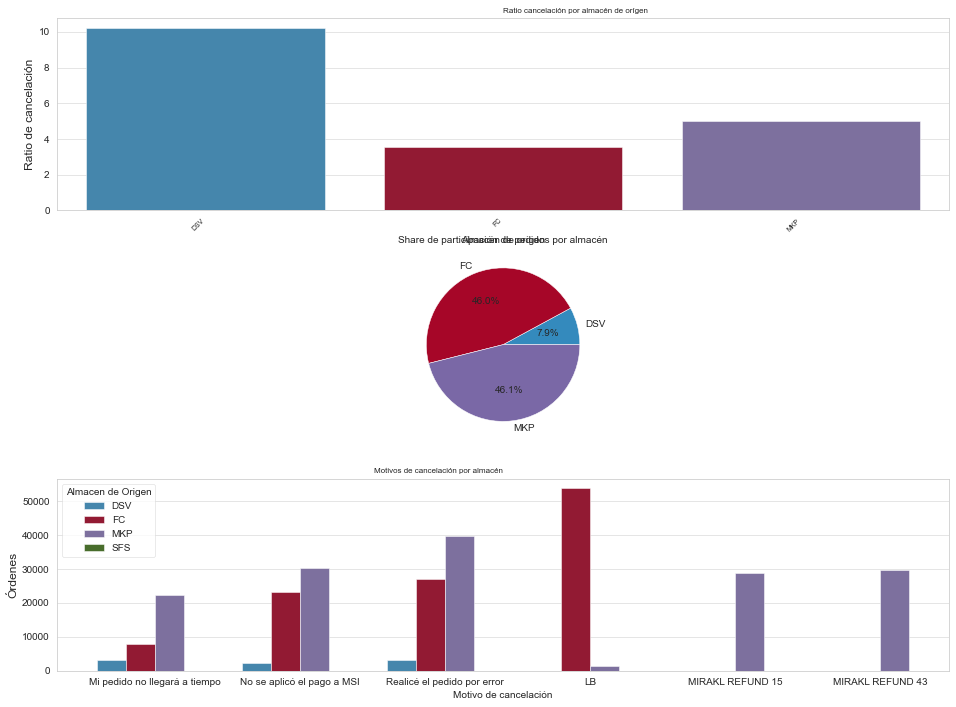

In [27]:
"""
 Hipótesis

 El formato Marketplace es quien genera el mayor volumen de cancelaciones y los reasons de cancelaciones se atribuyen a motivos por CLIENTE y no por 
 culpa de negocio (e.g Inventarios bajos)
 
"""
df_pagados = df[df["STATUS KEY"] == 1.0].groupby(["Año","Mes","Almacen de Origen"]).agg({'Order_ID': lambda x: x.nunique()}).reset_index()
df_pagados.rename(columns={'Order_ID':"Pedidos_pagados"}, inplace=True)
df_cancelados = df[df["STATUS KEY"] == 0.0].groupby(["Año","Mes","Almacen de Origen"]).agg({'Order_ID': lambda x: x.nunique()}).reset_index()
df_cancelados.rename(columns={'Order_ID':"Pedidos_cancelados"}, inplace=True)

df_pagados.loc[:,"Pedidos_pagados"] = df_pagados.loc[:,"Pedidos_pagados"].fillna(0) 
df_cancelados.loc[:,"Pedidos_cancelados"] = df_cancelados.loc[:,"Pedidos_cancelados"].fillna(0)

df_total = pd.concat([df_pagados,df_cancelados], axis= 0).reset_index()
df_total = df_total.groupby(["Año","Mes","Almacen de Origen"]).sum().reset_index()

df_total["Pedidos_totales"] = df_total["Pedidos_pagados"] + df_total["Pedidos_cancelados"]
df_total["Ratio_cancelacion"] = 100 * (df_total["Pedidos_cancelados"] /  (df_total["Pedidos_pagados"] + df_total["Pedidos_cancelados"]))
df_total["Año_mes"] = df_total["Año"].map(str) + df_total["Mes"].map(str)

df_almacen = df_total.groupby(["Almacen de Origen"])["Pedidos_cancelados","Pedidos_totales"].sum().reset_index()
df_almacen["Ratio_cancelacion"] =  100 * (df_almacen["Pedidos_cancelados"] / df_almacen["Pedidos_totales"])
df_almacen = df_almacen[df_almacen["Almacen de Origen"] != "SFS"]

f, a_ = plt.subplots(3,1, figsize = (16,12))
k1 = sns.barplot(data = df_almacen, x = "Almacen de Origen", y = "Ratio_cancelacion",ax = a_[0])
k1.set_xlabel('Almacén de orígen', fontsize = 10)
k1.set_ylabel('Ratio de cancelación')
k1.set_title("Ratio cancelación por almacén de orígen", fontsize = 8, horizontalalignment = "left")
# Get x-axis tick locations and labels
xtick_loc = k1.get_xticks()
xtick_labels = df_almacen["Almacen de Origen"].drop_duplicates()

# Set the x-axis ticks
k1.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right', fontsize = 7)


df_almacen.set_index("Almacen de Origen",inplace=True)
a_[1].pie(df_almacen.Pedidos_totales, labels = df_almacen.index, autopct = '%1.1f%%')
#a_[0].set_xlabel('Año / Mes', fontsize = 10)
#a_[0].set_ylabel('Ingreso prom.')
a_[1].set_title("Share de participación de pedidos por almacén", fontsize = 10, horizontalalignment = "center")
# Get x-axis tick locations and labels


#################
df_motivos = df[df["STATUS KEY"] == 0.0].groupby(["Almacen de Origen","Motivo de cancelacion"]).agg({'Order_ID': lambda x : x.nunique()}).reset_index()
df_motivos = df_motivos[df_motivos["Motivo de cancelacion"] != "SFS"]

top_10_motivos = df[df["STATUS KEY"] == 0.0].groupby(["Motivo de cancelacion"]).agg({'Order_ID': lambda x : x.nunique()}).sort_values(by = "Order_ID", ascending = False).reset_index()
top_10_motivos = top_10_motivos["Motivo de cancelacion"][:6]

df_motivos = df_motivos[df_motivos.loc[:,"Motivo de cancelacion"].isin(top_10_motivos)]

k3 = sns.barplot(data = df_motivos, x = "Motivo de cancelacion", y = "Order_ID",hue = "Almacen de Origen",ax = a_[2])
k3.set_xlabel('Motivo de cancelación', fontsize = 10)
k3.set_ylabel('Órdenes')
k3.set_title("Motivos de cancelación por almacén", fontsize = 8, horizontalalignment = "right")
# Get x-axis tick locations and labels
xtick_loc = k2.get_xticks()
xtick_labels = df_total["Año_mes"].drop_duplicates().values

plt.plot()

**Respuesta**

Vemos que los top motivos de cancelación recae en LB, lo cual , indica cancelaciones por "SIN INVENTARIO". Esto es, el cliente genera una órden de compra, paga el producto y en un rango menor a un día
se cancela la órden en automático sin precio aviso al cliente. BackOrderCancellation refiere al mismo use case.

Por otra parte, vemos también que los clientes cancelan por "No se aplicó el pago a MSI" y "Realicé el pedido por error". El primero sería un reason atribuible al cliente y negocio mientras que el segundo
sería atribuible al cliente. 

Así, veamos que **LAS PRINCIPALES CANCELACIONES RECAEN POR NEGOCIO**. 

Vemos de los dos primeros gráficos que DSV trae mayor ratio de cancelación y en segundo lugar MKP, que es nuestro formato de Marketplace.

Por otra parte, remarcamos que MKP trae una participación más grande que DSV, 43.8% vs 8.6%, lo cual, a pesar de que DSV tiene mayor ratio de cancelación, MKP contribuye en mayor medida 
a que este ratio se mueva. 

**Así, vemos que MARKETPLACE es de nuestros TOP OFFENDERS DE CANCELACIONES.**




**Pregunta 6: ¿Cuanto es el tiempo promeio de inter-arrivo (inter-compra) de compras sucecivas?**
Con esta pregunta pretendemos conocer cuanto tiempo tarda, en promedio, un cliente en regresar a realizar una compra al negocio.

[]

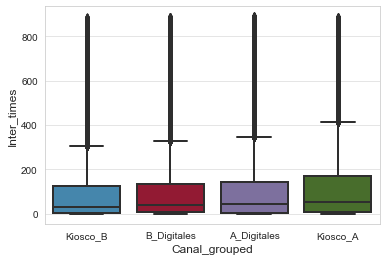

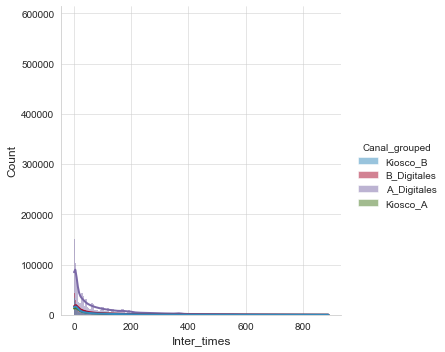

In [32]:
#Defining timings of recency, that is, how much tame does it take for a user to make a purchase?
# One thing to do in particular is to redefine the cut off time in which a customer is considered to churn. This could be accomplished by looking into the delta times which a customer takes to make a Purchase.  
import seaborn as sns
import matplotlib.pyplot as plt

df_customers_pt = df.loc[:,["Customer_ID","tipo de pago","Order_ID","FECHA DE CREACION"]].drop_duplicates()
df_customers_channel = df.loc[:,["Customer_ID","Canal_grouped","Order_ID","FECHA DE CREACION"]].drop_duplicates()

df_customers_pt.sort_values(by = ["Customer_ID","FECHA DE CREACION"], inplace = True)
df_customers_channel.sort_values(by = ["Customer_ID","FECHA DE CREACION"], inplace = True)
df_min_dates = df.groupby(["Customer_ID"]).agg({'FECHA DE CREACION':'min'}).reset_index()

df_customers_pt = pd.merge(df_customers_pt, df_min_dates, how='left', left_on="Customer_ID", right_on="Customer_ID")
df_customers_channel = pd.merge(df_customers_channel, df_min_dates, how='left', left_on="Customer_ID", right_on="Customer_ID")

df_customers_pt = df_customers_pt.set_index(["Customer_ID","tipo de pago","Order_ID"]) 
df_customers_channel = df_customers_channel.set_index(["Customer_ID","Canal_grouped","Order_ID"])

############################################################################################
diff_dias_pt = df_customers_pt.diff(axis = 0)
diff_dias_pt.reset_index(inplace=True)

diff_dias_pt = diff_dias_pt[(diff_dias_pt["FECHA DE CREACION_y"].dt.days == 0) & (diff_dias_pt["FECHA DE CREACION_x"].dt.days >= 0)]
diff_dias_pt = diff_dias_pt.loc[:,["Customer_ID","tipo de pago","FECHA DE CREACION_x"]]
diff_dias_pt = diff_dias_pt.rename(columns={'FECHA DE CREACION_x': 'Diff_dias_compras'})
diff_dias_pt["Inter_times"] = diff_dias_pt["Diff_dias_compras"].dt.days 

############################################################################################

diff_dias_channel = df_customers_channel.diff(axis = 0)
diff_dias_channel.reset_index(inplace=True)

diff_dias_channel = diff_dias_channel[(diff_dias_channel["FECHA DE CREACION_y"].dt.days == 0) & (diff_dias_channel["FECHA DE CREACION_x"].dt.days >= 0)] 
diff_dias_channel = diff_dias_channel.loc[:,["Customer_ID","Canal_grouped","FECHA DE CREACION_x"]]
diff_dias_channel = diff_dias_channel.rename(columns={'FECHA DE CREACION_x': 'Diff_dias_compras'})
diff_dias_channel["Inter_times"] = diff_dias_channel["Diff_dias_compras"].dt.days 

#Visualizing distributions times for all the clientes
#fig, x = plt.subplots(2,1, figsize = (12,15))

k1 = sns.boxplot(data = diff_dias_channel, x = 'Canal_grouped',y = 'Inter_times')
k2 = sns.displot(data = diff_dias_channel, x = 'Inter_times', hue = 'Canal_grouped', kde = True)
plt.plot()
#k2 = sns.displot(data = diff_dias_pt, x = 'Inter_times', hue = 'tipo de pago', kde = True, ax = x[1])

**Respuesta** 

De la gráfica de distribución del Boxplot, se observan datos interesantes como el hecho de que los Quartiles que engloban los tiempos de inter-compra (la diferencia en días entre la fecha que se realizó una compra y otra adyacente) de cada uno de los clientes son muy similares para cada Canal de compra de la base de información. Solo se muestra una mayor variación o varianza en los tiempos de intercompra para el canal de **"Kiosco_A"**. En general, podemos señalr que un **75% de los tiempos de intercompra son menores a los 143 días**. Esto sería equivalente a un semestre, es decir, los clientes regresan a realizar al menos una compra cada 6 meses. Esto haría sentido dado que en cada semestre del año tenemos dos eventos de venta que atraen gran cantidad de clientes. Uno en Mayo y el otro en Noviembre. 

Se destecaca que la mediana de tiempos de inter compra está en los 43 días y el promedio está en 102 días.

**Pregunta 7: ¿Cuantos clientes, dentro de la base total, presentan "Churn"? ¿Cuanto es esta proporción?**

Primero, preparamos nuestros datos para obtener la información a nivel cliente y poder contabilizar el conteo de clientes con Churn.

In [33]:
import datetime as dt
 
df = df[df.loc[:,"FECHA DE CREACION"] >= "2021-01-01"] # Toma solo los últimos dos años. 
df = df[(df.loc[:,"Motivo de cancelacion"] != "Actividad sospechosa") & (df.loc[:,"Motivo de cancelacion"] != "SUSPICIOUS_ACTIVITY")] #Elimina todos clientes que tienen compras sospechosas

days_threshold = 90  #Redefine el periodo en el cual uin cliente se considera que realiza Churn si no ha hecho una compra particular.m 
max_date = df.loc[:,"FECHA DE CREACION"].max()
cut_off =  max_date + dt.timedelta(days = -days_threshold)

customers_grouped = df.groupby(['Customer_ID']).agg({'FECHA DE CREACION': 'max'}).reset_index()
customers_grouped.rename(columns = {'FECHA DE CREACION':"lastPurchaseDate"}, inplace=True)
#Assign a customer with positive churn if it hasn't made any purchase in the  days_threshold

customers_churned = customers_grouped[(customers_grouped.lastPurchaseDate < cut_off.strftime("%Y-%m-%d"))]
customers_churned["Churn"] = 1
customers_churned = customers_churned.loc[:,["Customer_ID","Churn"]]  

# Seleccionamos las variables de interés y agrupamos la base de información a nivel Cliente (customer-based)
df_customer = df.groupby(["Customer_ID"]).agg({'Total_venta': np.sum, 'Order_ID': lambda x: x.nunique(), 'Total_piezas': np.sum, 'upc': lambda x: x.nunique(),
        'Venta bruta sin descuentos con flete': np.sum, 'Flete': np.sum, 'Total descuentos': np.sum, 'Venta cancelada': np.sum, 'Piezas canceladas':np.sum})
df_customer = pd.merge(df_customer, customers_grouped, how = 'left', left_on = 'Customer_ID', right_on = 'Customer_ID')

df_customer["Max_date"] = max_date
df_customer["Recency"] = (df_customer.loc[:,"Max_date"] - df_customer.loc[:,"lastPurchaseDate"]).dt.days
#df_customer #Imprime una muestra de como luce nuestro conjunto de datos hasta este punto.

# Get all the corresponding features or variables available.
df_customer.rename(columns = {'Total_venta': 'Total_income', 'Order_ID': 'Purchase_frequency','upc':'Unique_Products_purchased'}, inplace = True) ## Total revenue aported to the business
df_customer["Avg_basket_size"] = df_customer.loc[:,"Total_piezas"] / df_customer.loc[:,"Purchase_frequency"]  
df_customer["Avg_order_value"] = df_customer.loc[:,"Total_income"] / df_customer.loc[:,"Purchase_frequency"]  
df_customer["Ratio_sales_cancelled"] = df_customer.loc[:,"Venta cancelada"] / df_customer.loc[:,"Total_income"]  
df_customer["Ratio_items_cancelled"] = df_customer.loc[:,"Piezas canceladas"] / df_customer.loc[:,"Total_piezas"]  
df_customer["Avg_Shipment_cost_ratio"] =  df_customer.loc[:,"Flete"] / df_customer.loc[:,"Venta bruta sin descuentos con flete"]  
df_customer["Discount_ratio"] =  df_customer.loc[:,"Total descuentos"]  / (df_customer.loc[:,"Total descuentos"] + df_customer.loc[:,"Venta bruta sin descuentos con flete"])
df_customer["Avg_Shipment_cost_ratio"] = df_customer["Avg_Shipment_cost_ratio"].fillna(0)
df_customer["Discount_ratio"] = df_customer["Discount_ratio"].fillna(0)
#Unos últimos pasos
df_customer["Ratio_sales_cancelled"]  =  df_customer["Ratio_sales_cancelled"].fillna(0)
df_customer["Ratio_items_cancelled"]  =  df_customer["Ratio_items_cancelled"].fillna(0)
#Seleccionamos solo las variables.
df_customer = df_customer.loc[:,["Customer_ID","Total_income","Purchase_frequency","Unique_Products_purchased","Recency","Avg_basket_size","Avg_order_value","Ratio_sales_cancelled","Ratio_items_cancelled","Avg_Shipment_cost_ratio","Discount_ratio"]]

df_customer = pd.merge(df_customer, customers_churned, how = 'left', left_on = 'Customer_ID', right_on = 'Customer_ID')
df_customer["Churn"] = df_customer["Churn"].fillna(0)
df_customer["Churn"] = df_customer["Churn"].astype(int)
df_customer.head(10) # Imprime una muestra de los datos

,Customer_ID,Total_income,Purchase_frequency,Unique_Products_purchased,Recency,Avg_basket_size,Avg_order_value,Ratio_sales_cancelled,Ratio_items_cancelled,Avg_Shipment_cost_ratio,Discount_ratio,Churn
0,C1,128.450000,1,1,576,1.000000,128.450000,0.0,0.0,0.000000e+00,0.850849,1
1,C10000,9481.892759,1,1,630,1.000000,9481.892759,0.0,0.0,2.909357e-07,0.120010,1
2,C100000,58395.163103,10,10,4,1.300000,5839.516310,0.0,0.0,7.986674e-03,0.283161,0
3,C1000000,51163.835862,7,8,6,1.285714,7309.119409,0.0,0.0,2.325194e-03,0.125778,0
4,C1000002,3070.016552,3,5,417,1.666667,1023.338851,0.0,0.0,2.134101e-06,0.063630,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5417499,C999991,11357.058621,3,2,40,1.000000,3785.686207,0.0,0.0,1.039870e-02,0.132363,0
5417500,C999992,4134.480000,1,1,575,4.000000,4134.480000,0.0,0.0,0.000000e+00,0.215826,1
5417501,C999994,11238.103448,2,1,135,1.000000,5619.051724,0.0,0.0,5.983523e-03,0.099461,1
5417502,C999997,3987.100000,1,1,637,1.000000,3987.100000,0.0,0.0,0.000000e+00,0.000003,1


In [108]:
classes = np.zeros(2)
classes_share = np.zeros(2)
classes[0] = df_customer[df_customer.Churn == 1].size
classes[1] = df_customer[df_customer.Churn == 0].size

classes_share = np.round(100*(classes / classes.sum()),2)

df_churn = pd.DataFrame([classes], columns=["Churn","No Churn"])
df_churn_share = pd.DataFrame([classes_share], columns=["Churn","No Churn"])

df_churn = df_churn.T.reset_index()
df_churn_share = df_churn_share.T.reset_index()
df_churn_share.rename(columns= {'index' : 'Tipo',0:"Proporcion"}, inplace=True)


[]

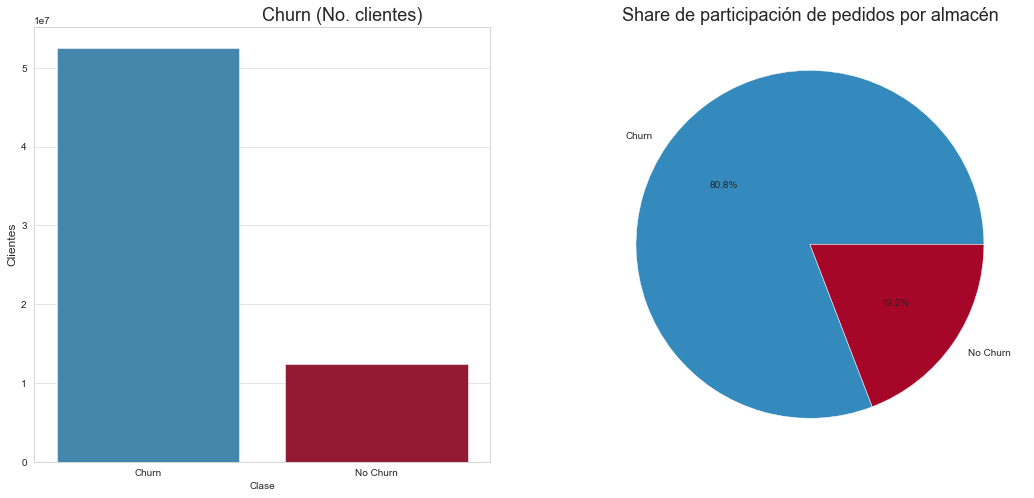

In [114]:
fig, x = plt.subplots(1,2,figsize = (18,8))

k = sns.barplot(data= df_churn, x = 'index', y = 0, ax = x[0])
k.set_xlabel('Clase', fontsize = 10)
k.set_ylabel('Clientes')
k.set_title("Churn (No. clientes)", fontsize = 18, horizontalalignment = "left")

x[1].pie(df_churn_share.Proporcion, labels = df_churn_share.Tipo, autopct = '%1.1f%%')
#a_[0].set_xlabel('Año / Mes', fontsize = 10)
#a_[0].set_ylabel('Ingreso prom.')
x[1].set_title("Share de participación de pedidos por almacén", fontsize = 18, horizontalalignment = "center")
# Get x-axis tick locations and labels
plt.plot()

**Respuesta**

Cómo se observa de una manera simple en la visualización anterior, alrededor del 80% de los clientes presentan "Churn"y solo un 20% presentan "No Churn". Cabe recordar que la regla para definir a un cliente con Churn es aquel que no haya hecho una compra en los últimos 90 días. 

De este manera, vemos que podríamos estar delante de un problema del tipo "Desbalanceado". Con esto, en el futuro durante el manejo del modelo deberemos aplicar técnicas estadísticas o probar otros modelos que permitan manejar de mejor manera este problema.




**Conclusiones del análisis exploratorio**

La empresa claramente ha tenido crecimientos en términos de venta y órdenes. De acuerdo con el análisis anterior, tenemos que prestar foco en reterner a nuestros clientes ya que nuestro crecimiento empieza a desacelerar a partir del 2022 y a partir de los últimos meses de estos años observamos una mayor participación de venta y clientes del tipo "No nuevo". Tenemos que pensar en estrategias de retención sobre aquellos clientes para evitar el Churn y capitalizar el loalty de nuestros clientes sobre el negocio.

También, en el análisis determinamos que el 75% de los tiempos de intercompra están entre los **0 y 143 días**, esto es importante ya que permitirá **definir el parámetro para el cual consideramos cuando un cliente tiene "Churn" o no.**

También, podemos anticipar que podríamos tener un modelo con problema de clases desbalanceadas ya que la proporción de clientes que realizan "Churn" es de 80%, mientras que los que no es de 18%. La clases predominante que puede sesgar nuestro análisis es de aquellos con **"Churn"**.

Algunos comments adicionales:

**Variables a considerar para el modelo de churn:  Basket size, Venta , Piezas compradas, ticket promedio, frecuencia de compra, %descuentos sobre venta, ratio de cancelación, ratio de devolución, canal de compra y tipo de pago.**

**Adicional:** Vale la pena revisar el ratio de devolución de nuestors clientes para validar que pain points han tenido en su experiencia de compra. 



### Creación y procesamiento del conjunto de entrenamiento para aplicación de algoritmo de Feature Selection

Una vez realizado el proceso de **Exploratory Data Analysis (EDA)**, daremos paso a la selección de un modelo de Machine Learing para la aplicación de un modelo de Feature Selection para la reducción de la dimensionalidad de nuestras variables y comenzar. El proceso de EDA nos ayudó a identificar aquellas variables que podemos utilizar en el modelo para crear nustro predictor de "Churn".

Antes de pasar al proceso de feature selection, se muestran algunos pasos previos para la agrupación de la información a nivel cliente (customer-bases) y las principales características de interés. 

Cabe destacar que con este ejercicio se pretende construir un modelo que prediga el **'Churn'** de un cliente, es decir, la probabilidad de que un cliente abandone su relación con el negocio y no vuelva a realizar compras en el futuro. 

Para determinar cuando un cliente presenta **"Churn"** se considera un periodo de 90 días en el cual si un cliente no realiza una compra, se asgina la etiqueta de "1" como un cliente que presenta **"Churn"** , mientras que si no lo tiene entonces se le asigna la etiqueta de "0".

Posteriormente, al final del notebook discutimos sobre si el modelo presenta **Overfitting (High Variance & Low bias)** o **Underfitting (Low variance and high Bias)**. 

In [5]:
import datetime as dt
 
df = df[df.loc[:,"FECHA DE CREACION"] >= "2021-01-01"] # Toma solo los últimos dos años. 
df = df[(df.loc[:,"Motivo de cancelacion"] != "Actividad sospechosa") & (df.loc[:,"Motivo de cancelacion"] != "SUSPICIOUS_ACTIVITY")] #Elimina todos clientes que tienen compras sospechosas

days_threshold = 90  #Redefine el periodo en el cual uin cliente se considera que realiza Churn si no ha hecho una compra particular.m 
max_date = df.loc[:,"FECHA DE CREACION"].max()
cut_off =  max_date + dt.timedelta(days = -days_threshold)

customers_grouped = df.groupby(['Customer_ID']).agg({'FECHA DE CREACION': 'max'}).reset_index()
customers_grouped.rename(columns = {'FECHA DE CREACION':"lastPurchaseDate"}, inplace=True)
#Assign a customer with positive churn if it hasn't made any purchase in the  days_threshold

customers_churned = customers_grouped[(customers_grouped.lastPurchaseDate < cut_off.strftime("%Y-%m-%d"))]
customers_churned["Churn"] = 1
customers_churned = customers_churned.loc[:,["Customer_ID","Churn"]]  

In [7]:
# Seleccionamos las variables de interés y agrupamos la base de información a nivel Cliente (customer-based)
df_customer = df.groupby(["Customer_ID"]).agg({'Total_venta': np.sum, 'Order_ID': lambda x: x.nunique(), 'Total_piezas': np.sum, 'upc': lambda x: x.nunique(),
        'Venta bruta sin descuentos con flete': np.sum, 'Flete': np.sum, 'Total descuentos': np.sum, 'Venta cancelada': np.sum, 'Piezas canceladas':np.sum})
df_customer = pd.merge(df_customer, customers_grouped, how = 'left', left_on = 'Customer_ID', right_on = 'Customer_ID')

In [10]:
df_customer["Max_date"] = max_date
df_customer["Recency"] = (df_customer.loc[:,"Max_date"] - df_customer.loc[:,"lastPurchaseDate"]).dt.days
df_customer #Imprime una muestra de como luce nuestro conjunto de datos hasta este punto.

,Customer_ID,Total_venta,Order_ID,Total_piezas,upc,Venta bruta sin descuentos con flete,Flete,Total descuentos,Venta cancelada,Piezas canceladas,lastPurchaseDate,Max_date,Recency
0,C1,128.450000,1,1.0,1,128.450000,0.000000,732.76,0.0,0.0,2021-11-11,2023-06-10,576
1,C10000,9481.892759,1,1.0,1,9481.892759,0.002759,1293.11,0.0,0.0,2021-09-18,2023-06-10,630
2,C100000,58395.163103,10,13.0,10,58395.163103,466.383103,23066.90,0.0,0.0,2023-06-06,2023-06-10,4
3,C1000000,51163.835862,7,9.0,8,51163.835862,118.965862,7361.17,0.0,0.0,2023-06-04,2023-06-10,6
4,C1000002,3070.016552,3,5.0,5,3070.016552,0.006552,208.62,0.0,0.0,2022-04-19,2023-06-10,417
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417499,C999991,11357.058621,3,3.0,2,11357.058621,118.098621,1732.59,0.0,0.0,2023-05-01,2023-06-10,40
5417500,C999992,4134.480000,1,4.0,1,4134.480000,0.000000,1137.92,0.0,0.0,2021-11-12,2023-06-10,575
5417501,C999994,11238.103448,2,2.0,1,11238.103448,67.243448,1241.20,0.0,0.0,2023-01-26,2023-06-10,135
5417502,C999997,3987.100000,1,1.0,1,3987.100000,0.000000,0.01,0.0,0.0,2021-09-11,2023-06-10,637


In [11]:
# Get all the corresponding features or variables available.
df_customer.rename(columns = {'Total_venta': 'Total_income', 'Order_ID': 'Purchase_frequency','upc':'Unique_Products_purchased'}, inplace = True) ## Total revenue aported to the business
df_customer["Avg_basket_size"] = df_customer.loc[:,"Total_piezas"] / df_customer.loc[:,"Purchase_frequency"]  
df_customer["Avg_order_value"] = df_customer.loc[:,"Total_income"] / df_customer.loc[:,"Purchase_frequency"]  
df_customer["Ratio_sales_cancelled"] = df_customer.loc[:,"Venta cancelada"] / df_customer.loc[:,"Total_income"]  
df_customer["Ratio_items_cancelled"] = df_customer.loc[:,"Piezas canceladas"] / df_customer.loc[:,"Total_piezas"]  
df_customer["Avg_Shipment_cost_ratio"] =  df_customer.loc[:,"Flete"] / df_customer.loc[:,"Venta bruta sin descuentos con flete"]  
df_customer["Discount_ratio"] =  df_customer.loc[:,"Total descuentos"]  / (df_customer.loc[:,"Total descuentos"] + df_customer.loc[:,"Venta bruta sin descuentos con flete"])
df_customer["Avg_Shipment_cost_ratio"] = df_customer["Avg_Shipment_cost_ratio"].fillna(0)
df_customer["Discount_ratio"] = df_customer["Discount_ratio"].fillna(0)
#Unos últimos pasos
df_customer["Ratio_sales_cancelled"]  =  df_customer["Ratio_sales_cancelled"].fillna(0)
df_customer["Ratio_items_cancelled"]  =  df_customer["Ratio_items_cancelled"].fillna(0)
#Seleccionamos solo las variables.
df_customer = df_customer.loc[:,["Customer_ID","Total_income","Purchase_frequency","Unique_Products_purchased","Recency","Avg_basket_size","Avg_order_value","Ratio_sales_cancelled","Ratio_items_cancelled","Avg_Shipment_cost_ratio","Discount_ratio"]]

Realizamos últimos pasos de pre procesado e imprimimos como se ve la base de información final para el modelo 

In [12]:
df_customer = pd.merge(df_customer, customers_churned, how = 'left', left_on = 'Customer_ID', right_on = 'Customer_ID')
df_customer["Churn"] = df_customer["Churn"].fillna(0)
df_customer["Churn"] = df_customer["Churn"].astype(int)
df_customer.head(20) 

,Customer_ID,Total_income,Purchase_frequency,Unique_Products_purchased,Recency,Avg_basket_size,Avg_order_value,Ratio_sales_cancelled,Ratio_items_cancelled,Avg_Shipment_cost_ratio,Discount_ratio,Churn
0,C1,128.450000,1,1,576,1.000000,128.450000,0.0,0.0,0.000000e+00,0.850849,1
1,C10000,9481.892759,1,1,630,1.000000,9481.892759,0.0,0.0,2.909357e-07,0.120010,1
2,C100000,58395.163103,10,10,4,1.300000,5839.516310,0.0,0.0,7.986674e-03,0.283161,0
3,C1000000,51163.835862,7,8,6,1.285714,7309.119409,0.0,0.0,2.325194e-03,0.125778,0
4,C1000002,3070.016552,3,5,417,1.666667,1023.338851,0.0,0.0,2.134101e-06,0.063630,1
5,C1000003,861.210000,1,1,542,1.000000,861.210000,0.0,0.0,0.000000e+00,0.000000,1
6,C1000007,11874.120000,1,2,881,2.000000,11874.120000,0.0,0.0,1.408441e-02,0.153621,1
7,C1000009,1723.270000,1,1,501,1.000000,1723.270000,0.0,0.0,0.000000e+00,0.200079,1
8,C1000010,3704.290690,2,3,461,1.500000,1852.145345,0.0,0.0,1.861774e-07,0.000005,1
9,C1000011,3792.230000,1,1,100,1.000000,3792.230000,0.0,0.0,0.000000e+00,0.000003,1


### Feature Selection implementation: Forward Method y selección de modelo de ML (Machine Learning)

Durante las clases previas se denotaron 3 métodos particulares para la selección de feautres 

1. Forward selection
2. Backward selection
3. Bi directional elimination

En este caso se utilizará el método: **"Forward selection"**

El problema que tenemos en este caso es del tipo **"Clasificación"** así, el método de entrenamiento para nuestro modelo de predicción de **Churn** es: **"Logistic Regression"**

Antes de comenzar con el proceso de Forward selection, harémos con un ejercicio previo de experimentación donde calcularemos la matriz de confusión y métricas de medición de performance para un problema de clasificación.

Las variables totales para nuestro modelo de regresión y de las cuales aplicaremos el proceso de forward selection será el siguiente:

- Total_income : Total de venta o aportación monetaria de un cliente particular
-  Purchase_frequency: Total de órdenes solicitadas por parte del cliente
- Unique_Products_purchased: Total de productos únicos comprados
- Recency: Diferencia en días desde la última compra del cliente hasta la fecha más reciente de la base.
- Avg_basket_size = Piezas promedio compradas por órden de compra.
- Avg_order_value: Ticket promedio de compra de un cliente particular.
- Ratio_sales_cancelled: Proporción de venta cancelada sobre la venta total del cliente.
- Ratio_items_cancelled: Proporción de piezas canceladas en realción a las piezas totales compradas por parte del cliente.
- Avg_Shipment_cost_ratio: Costo promedio de envío para un cliente particular. Esto es un factor considerado sobre el total de la venta.
- Discount_ratio: El porcentje de descuentos aplicables en el historial de órdenes en relación a la venta total.
- Churn: Determina si un cliente abandonó su relación de compra con el negocio o no. **Este está determinado sobre aquellos clientes que no hayan hecho una compra en los últimos 90 días**.



### Ejercicio de experimentación

In [13]:
#Making feature engeneering & model selection

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sns.set_style('whitegrid')

(row,col) = df_customer.shape

X = df_customer.iloc[:,1:col-1] #Separamos nuestra matriz de features o características del modelo
y = df_customer["Churn"] # Separamos nuestra variables objetivo.

columns_taken = X.columns.values

#Esntandarizamos nuestro modelo mediante una transformación lineal de los datos, esto es, restamos la media y dividimos por la desviación estandar de cada uno de los features.
scaler = StandardScaler()
X = scaler.fit_transform(X)

Separamos nuestra matriz de características / fetures y variable objetivo en conjuntos de Entrenamiento/Training y Testin en una proporción de 70% y 30% respectivamente. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#Inicializamos un modelo de Regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

#Obtén las predicciones del modelo sobre el conjunto de testing
predictions = model.predict(X_test)

<Figure size 1296x288 with 0 Axes>

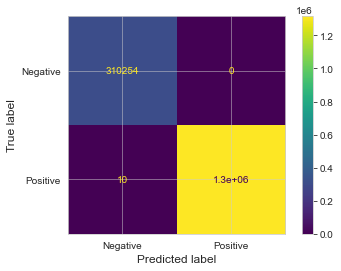

In [17]:
# Graficamos una matriz de confusión
plt.figure(figsize=(12,4))
metrics.plot_confusion_matrix(model, X_test, y_test, display_labels=['Negative', 'Positive'])

In [18]:
#Obtenemos los números de la matriz de confusión
confusion = metrics.confusion_matrix(y_test, predictions)
confusion.ravel()

array([ 310254,       0,      10, 1314988], dtype=int64)

In [19]:
#Medición de accuracy
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.9999938471080178

**Comentario**
De la matriz de confusión y del accuracy que nos despliega el modelo a través de scikit learn, observamos que tenemos un problema de **clases imbalanceadas**.

El modelo es muy bueno para predecir los clientes con Churn dado que en el data set completo, tenemos al redeodor de 4.37 M de clientes con **"Churn"** de un total de **5.4 M**, es decir, más de unn 80% de los clientes tienen efecto de Churn o de **no haber realizado una compra en menos de 90 días**. 

De lo anterior, para la realización del proceso de Foward selection utilizaremos la métrica **"F1 - Score"** el cual consolida el desempeño general en términos de Recall y Precision y funcinoa para medir modelos con efecto de precision y recall.  

In [237]:
# Se evalua la precision para cada uno de las categorias
precision_positiva = metrics.precision_score(y_test, predictions, pos_label=1)
precision_negativa = metrics.precision_score(y_test, predictions, pos_label=0)
precision_positiva, precision_negativa

(1.0, 0.9999677693834927)

In [239]:
# Se calcula el recall 
recall_sensibilidad = metrics.recall_score(y_test, predictions, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, predictions, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.9999923954256965, 1.0)

In [238]:
# F1 positiovs y negativos
f1_positivo = metrics.f1_score(y_test, predictions, pos_label=1)
f1_negativo = metrics.f1_score(y_test, predictions, pos_label=0)
f1_positivo, f1_negativo

(0.9999961976983909, 0.999983884432039)

In [241]:
#Imprimimos todas las métricas en 1
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    310254
           1       1.00      1.00      1.00   1314998

    accuracy                           1.00   1625252
   macro avg       1.00      1.00      1.00   1625252
weighted avg       1.00      1.00      1.00   1625252



**Comentario**

En general observamos que nuestro precision , recall y especificidad (tanto positivo como negativo) tienen valores cercanos a uno.Lo cual,el modelo tiene la capacidad de manejar perfectamente la clase de clientes con **"Churn"**, sin embargo, también nos haría pensar que el modelo tiene un sesgo dado el problema de clases imbalanceadas.

### Feature Selection implementation: Forward method

A continuación, implementaremos el algoritmo de foward selection para determinar cuales dimensiones o características son las que contribuyen an nuestro modelo de regresión Logística a tener un mejor performance.

La métrica a utilizar para ir seleccionando que features son los óptimos será: **F1 Score**.



In [267]:
from sklearn.base import clone
# Separamos nuestros datos de nuevo en conjuntos de entrenamiento y test ahora con ua proproción diferente (80 - 20)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

features_seleccionados = list()

modelo_inicial = LogisticRegression()
modelo_inicial.fit(X_train, y_train)
predicciones_base = modelo_inicial.predict(X_test)

base_f1 = metrics.f1_score(y_test, predicciones_base)
mejor_f1 = base_f1

# Step 6: Iterate over the remaining features and select the one that results in the highest accuracy

#Calculamos un índice que referencíe las características del data set total. 
features_restantes = [x for x in range(X.shape[1])] 

while features_restantes:
    mejor_feature = None
    for feature in features_restantes:
        temp_features = features_seleccionados + [feature]
        X_train_temp = X_train[:, temp_features]
        X_test_temp = X_test[:, temp_features]

        classifier = clone(modelo_inicial)  
        classifier.fit(X_train_temp, y_train)
        y_pred_temp = classifier.predict(X_test_temp)
        f1_score = metrics.f1_score(y_test, y_pred_temp)

        if f1_score > mejor_f1:
            mejor_f1 = f1_score
            mejor_feature = feature

    if mejor_feature is not None:
        features_seleccionados.append(mejor_feature)
        features_restantes.remove(mejor_feature)
    else:
        break

print("Los features seleccionados son los siguientes: ")
print(df_customer.iloc[:,1:col-1].columns.values[features_seleccionados]) 

# Use final_classifier for predictions and evaluation

Los features seleccionados son los siguientes: 
['Recency']


**Conclusiones sobre la implementación de Forward Method** 

Se construye un proceso de Forward selector en el cual empieza con un modelo base de Regresión Logística que considera **todas las variables** propuestas. De aquí, va empezando a tomar variable por variable y calcular el F1 Score en cada iteración y combinación de features de tal manera que se queda con el F1 score de mejor performance y sus dimensiones o features correspondientes. De todo el proceso ejecutado en la celda anterior, se determina que solo se debe emplear una característica o feature:

1. Recency: Tiempo en días entre la última fecha de compra y el día más reciente de la base.

Habíamos visto previamente en el experimento que nuestro modelo tiene un sesgo de predicción por problema de clases imbalanceadas y que tanto en precision como recall tiene valores muy altos manejando perfectamente la clase de clientes con **"Churn"**. Así que considerar solo una variable podría no hacer sentido dado que el modelo con todas las variables **'resultaba ser bastante bueno**. Con esto, decidimos **quedarnos con todas las variables**.



### Overfitting y Underfitting (Discusión)

Para este caso particular, el modelo que utilizaremos será aquel con TODAS LOS FEATURES del ejercicio de experimentación. Dicho esto, traemos de nuevo los siguientes datos:


Accuracy:

In [20]:
#Medición de accuracy
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.9999938471080178

F1 - Score


In [21]:
# F1 positiovs y negativos
f1_positivo = metrics.f1_score(y_test, predictions, pos_label=1)
f1_negativo = metrics.f1_score(y_test, predictions, pos_label=0)
f1_positivo, f1_negativo

(0.9999961976983909, 0.999983884432039)

**Conclusiones de Overfitting y Underfitting**

De las métricas de evaluación y del ejercicio de experimentación comentamos que tenemos un alto índice de accuracy y de F1 -Score, con lo cual , podríamos concluir que el modelo es muy buneo en predecir las clases objetivas en función de un nuevo dato/cliete a evalular.  con sus respectivas características / features

Dado los altos índices de accuracy o F1 - Score (99% para ambos), podríamos pensar en que el modelo tiene **Overfitting (High Variance)**, esto , por el **alto índice de accuracy** dado que tenemos un problema de clasificación.

Cabe destacar que un problema de **High Variance** se presenta dada un alto performnace de las métricas de evaluación, en este caso, un alto índice de accuracy. Y a su vez también se debe a una alta dimensionalidad en los datos, esto es, un gran número de variables que se están considerando dentro del modelo. 

Se proponen dos formas de poder controlar el tema de **Overfitting**:

1. Utilizar un método de feature selection, e.g, Forward Method, Backward method o Bidirectional. Esto reducirá la dimensionalidad de los datos que alimentan el modelo y consideramos solo los features más representativos.
2. Dado que usamos un modelo de Regresión logística, a la función objetivo se integraría **la función "Sigmoide"** y un **término de regularización** para disminiuir el ajuste de los paramétros del modelo en contrapeso del alto índice de varianza u overfitting en los datos.  

### Conclusión general de la primer Entrega del proyecto Final

Durante la elaboración de la primer entrega del proyecto, destacamos los siguiente puntos que se obtuvieron a través de todo el ejercicio:

1. Se definieron los objetivos del análisis de Churn, contexto comercial y analítico ppara determinar cual es el problem statement y proponer una forma de solucionar el problema en cuestión, el cual consiste en un modelo de predicción que permita definir cuales clientes tienen mayor probabilidad de "Churn" o de dejar de comprar en el negocio.
2. Se realizó un análisis exploratorio el cual nos permitió identificar que nuestra venta se determina más a través de clientes no nuevos, determinar los umbrales de tiempo para determinar cuando un cliente presenta Churn, conocer las categorías comerciales y canales de compra con mayor frecuencia de compra así como la proporción de clientes con Churn, el cual se distribuye en un 80%.
3. Proecesamos nuestra base de información original a una estrcutrua adecuada para poder ingestarla a un modelo de Machine Learning. En este caso el modelo seleccionado de prueba es "Logistic Regression".
4. Realizamos un ejercicio de experimentación para calcular las métricas de evaluación como Precision, Recall, F1 Score y Accuracy. Observamos que nuestro modelo tinene un accuracy de 99% de los ejemplos en el set de test así como un alto valor de F1 Score. Lo anterior nos permitió identficar que estamos ante un **problema de desbalance de clases**. 
4. Una vez seleccionado el modelo, realizamos un proceso de selección de feature a través del "Forward Method" el cual seleccionará el conjunto de variables más representativas que maximicen el indicador de F1 Score, el cual fue propuesto como métrica de evaluación. El proceso determina que solo utilicemos una sola variable: **Recency", sin embargo, nuestro modelo ya tiene un alto valor de de accuracy con el 99% y de F1 Score con todas las variables. De cara a la entrega final lo ideal es tratar este problema de desbalanceo a través de una técnica estadística de oversampling o modelos que permitan utilizar mejor el problema de desbalanceo. 
5. Se discute posteriormente el tema de overfitting y maneras en que podemos arreglarlo a tavés del modelo de Logistic Regression.